In [1]:
from matplotlib import pyplot as plt
import random
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn import preprocessing  


In [2]:
#random values for x1
x1=[]
for i in range(1000):
    rand=random.random()
    x1.append(rand)
    
#random values for x2
x2=[]
for i in range(1000):
    rand=random.random()
    x2.append(rand)
    
#random values for x3
x3=[]
for i in range(1000):
    rand=random.random()
    x3.append(rand)
    
# Generate 'y values' using y = 5*x1 +3*x2 +1.5x3+6
y=[]
for i in range(1000):
    val= 5*x1[i] +3*x2[i] +1.5*x3[i]+6
    y.append(val)
    
# make a data frame 'df' 
dataval={'x1':x1,'x2':x2,'x3':x3,'y':y}
df=pd.DataFrame(dataval)

#split the generated data
X=df[['x1','x2','x3']]
Y=df['y']

x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3,random_state=42)

plt.scatter()

In [11]:
"""cost function"""
def costfunction (X,Y,wights):
        prediction = X.dot(wights.transpose())
        cost = [i**2 for i in np.subtract(Y,prediction)]
        return (1/(2*len(Y)) * np.sum(np.array(cost)))
    

"""GradientDescent function"""
def gradientDescent(X,Y,learingRate,iterations):
        n = len(Y)
        #added one for bias
        X = np.hstack((np.ones((n,1)), X))
        #num os wights = num of features = num of X columns '''len(X[0]'''
        wights = np.zeros(len(X[0]))
        
        for i in range(iterations):
            y_pred = X.dot(wights.transpose())           
            partial = 1/n * (X.transpose().dot(np.subtract(y_pred,Y))) 
            #update wights of x's
            wights = wights - ( learingRate * partial ) 

        return wights
    
    
"""for fitting data """
def fit(x_test, wights):
    x_test =  np.hstack((np.ones((len(x_test),1)), x_test))
    return x_test.dot(wights)


wights  = gradientDescent(x_train,y_train,0.1,1000)
y_pred = fit(x_test,wights)

#mae for evalute the model the closer to 0, the better
mae  = mean_absolute_error(y_test, y_pred)

print("mean_absolute_error is: " + str(mae))
print("Final wights are: " + str(wights))

mean_absolute_error is: 0.00012531814320477787
Final wights are: [6.00016499 4.99954903 2.99988313 1.50025521]


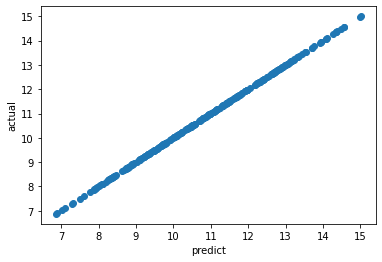

In [4]:
plt.scatter(y_pred , y_test)
plt.xlabel("predict")
plt.ylabel("actual")
plt.show()

In [5]:
path = os.getcwd() + os.sep + "USA_Housing.csv"
housing_data = pd.read_csv(path)
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
housing_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


<AxesSubplot:ylabel='Frequency'>

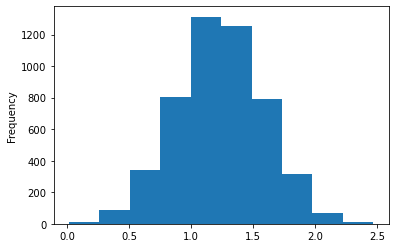

In [7]:
housing_data["Price_million"] = housing_data["Price"] / 1000000
housing_data = housing_data.drop("Price", axis = 1)
housing_data["Price_million"].plot(kind = "hist")

In [8]:
X_house = housing_data.drop(["Price_million","Address"], axis = 1)
Y_house = housing_data["Price_million"]


X_house = preprocessing.scale(X_house)
  
# Scaled feature
X_house = pd.DataFrame(X_house)

x_train_house, x_test_house, y_train_house, y_test_house = train_test_split(X_house,Y_house, test_size=0.3,random_state=42)

wights_housing  = gradientDescent(x_train_house,y_train_house,0.1,10000)

y_pred_house = fit(x_test_house,wights_housing)

#mae for evalute the model the closer to 0, the better
housePrice_mae= mean_absolute_error(y_test_house, y_pred_house)
print("House Price mae is: " + str(housePrice_mae))
print("Final House Price wights are: " + str(wights_housing))

House Price mae is: 0.08113556608241773
Final House Price wights are: [1.23127864 0.23046453 0.1641592  0.12051471 0.00291362 0.15101936]


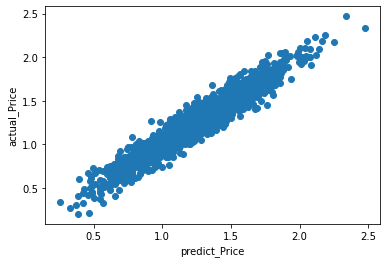

In [9]:
plt.scatter(y_pred_house, y_test_house)
plt.xlabel("predict_Price")
plt.ylabel("actual_Price")
plt.show()